In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [15]:
df = pd.read_csv('../datasets/teams/EnglishPremierLeague/team_stats.csv')
df.head()

,Unnamed: 0,team_id,team_name,apps,goals,shots_pg,yels,reds,possession,pass_success,aerials_won,rating,shots_conceded_pg,tackles_pg,intercept_pg,fouls_pg,shots_on_target_pg,dribbles_pg,fouled_pg
0,0,13,Arsenal,38,88,15.6,52,0,59.7,85.4,12.9,6.81,9.0,14.9,6.2,9.8,5.4,9.4,11.4
1,0,24,Aston Villa,38,51,11.3,80,1,49.2,81.1,11.7,6.65,11.3,16.7,8.5,11.0,4.0,7.7,13.1
2,0,183,Bournemouth,38,37,9.4,69,0,40.0,77.5,13.8,6.53,16.5,16.3,9.3,10.3,3.5,8.4,9.6
3,0,189,Brentford,38,58,10.7,55,1,43.3,74.8,17.5,6.67,14.7,15.4,9.0,9.3,4.3,6.9,10.5
4,0,211,Brighton,38,72,16.1,59,0,60.5,85.9,11.7,6.72,10.2,16.2,8.0,11.2,6.1,9.1,10.7


In [16]:
df.columns

Index(['Unnamed: 0', 'team_id', 'team_name', 'apps', 'goals', 'shots_pg',
       'yels', 'reds', 'possession', 'pass_success', 'aerials_won', 'rating',
       'shots_conceded_pg', 'tackles_pg', 'intercept_pg', 'fouls_pg',
       'shots_on_target_pg', 'dribbles_pg', 'fouled_pg'],
      dtype='object')

In [17]:
df = df[['team_name', 'apps', 'goals','possession','pass_success','aerials_won','rating','shots_conceded_pg','tackles_pg','intercept_pg']]

In [18]:
df.head()

,team_name,apps,goals,possession,pass_success,aerials_won,rating,shots_conceded_pg,tackles_pg,intercept_pg
0,Arsenal,38,88,59.7,85.4,12.9,6.81,9.0,14.9,6.2
1,Aston Villa,38,51,49.2,81.1,11.7,6.65,11.3,16.7,8.5
2,Bournemouth,38,37,40.0,77.5,13.8,6.53,16.5,16.3,9.3
3,Brentford,38,58,43.3,74.8,17.5,6.67,14.7,15.4,9.0
4,Brighton,38,72,60.5,85.9,11.7,6.72,10.2,16.2,8.0


In [19]:
df['goals_pg'] = df['goals']/df['apps']

In [20]:
df.head()

,team_name,apps,goals,possession,pass_success,aerials_won,rating,shots_conceded_pg,tackles_pg,intercept_pg,goals_pg
0,Arsenal,38,88,59.7,85.4,12.9,6.81,9.0,14.9,6.2,2.315789
1,Aston Villa,38,51,49.2,81.1,11.7,6.65,11.3,16.7,8.5,1.342105
2,Bournemouth,38,37,40.0,77.5,13.8,6.53,16.5,16.3,9.3,0.973684
3,Brentford,38,58,43.3,74.8,17.5,6.67,14.7,15.4,9.0,1.526316
4,Brighton,38,72,60.5,85.9,11.7,6.72,10.2,16.2,8.0,1.894737


In [23]:
# implement Kmeans
X = np.array(df[['possession','pass_success','aerials_won','rating','shots_conceded_pg','tackles_pg','intercept_pg','goals_pg']])
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
df.head(20)

,team_name,apps,goals,possession,pass_success,aerials_won,rating,shots_conceded_pg,tackles_pg,intercept_pg,goals_pg,cluster
0,Arsenal,38,88,59.7,85.4,12.9,6.81,9.0,14.9,6.2,2.315789,4
1,Aston Villa,38,51,49.2,81.1,11.7,6.65,11.3,16.7,8.5,1.342105,2
2,Bournemouth,38,37,40.0,77.5,13.8,6.53,16.5,16.3,9.3,0.973684,3
3,Brentford,38,58,43.3,74.8,17.5,6.67,14.7,15.4,9.0,1.526316,3
4,Brighton,38,72,60.5,85.9,11.7,6.72,10.2,16.2,8.0,1.894737,4
5,Chelsea,38,38,58.8,85.8,13.1,6.62,11.5,19.5,9.0,1.000000,4
6,Crystal Palace,38,40,45.8,79.3,13.1,6.61,12.0,18.2,9.4,1.052632,0
7,Everton,38,34,42.5,77.0,15.3,6.62,15.2,18.6,10.3,0.894737,3
8,Fulham,38,55,48.6,80.0,13.5,6.61,13.3,16.4,8.9,1.447368,2
9,Leeds,38,48,46.3,74.9,15.5,6.50,13.9,22.1,10.3,1.263158,0


In [26]:
df.cluster.value_counts()

cluster
2    6
3    5
4    4
0    4
1    1
Name: count, dtype: int64

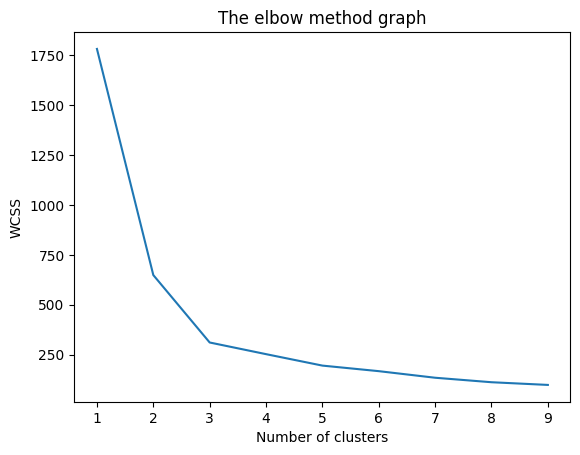

In [28]:
# find out the optimal number of clusters
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wcss)
plt.title('The elbow method graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

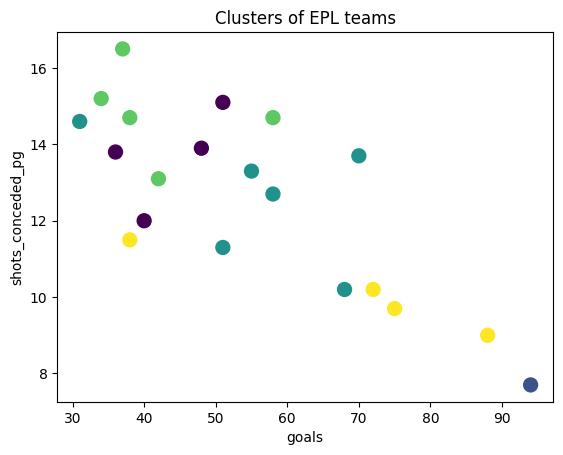

In [47]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# visualize
plt.scatter(df['goals'], df['shots_conceded_pg'], s=100, c=df['cluster'])


# plot centroid
plt.title('Clusters of EPL teams')
plt.xlabel('goals')
plt.ylabel('shots_conceded_pg')
plt.show()

In [48]:
# standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 1.297473  ,  1.16555961, -0.55208893,  1.43604875, -1.58142676,
        -1.05534437, -2.07741658,  1.88167292],
       [-0.08351702,  0.14167681, -1.30923947,  0.0307411 , -0.5835443 ,
        -0.13986492, -0.33041178, -0.17814655],
       [-1.29352731, -0.7155274 ,  0.01577397, -1.02323963,  1.67253777,
        -0.34330479,  0.27724207, -0.9575377 ],
       [-0.85950188, -1.35843056,  2.35032146,  0.20640456,  0.89158628,
        -0.80104452,  0.04937187,  0.21154903],
       [ 1.40269128,  1.28461575, -1.30923947,  0.6455632 , -1.06079243,
        -0.39416476, -0.71019543,  0.99094018],
       [ 1.17910242,  1.26080453, -0.42589718, -0.23275408, -0.49677192,
         1.28421423,  0.04937187, -0.9018669 ],
       [-0.53069473, -0.2869253 , -0.42589718, -0.32058581, -0.27984095,
         0.62303463,  0.3531988 , -0.79052531],
       [-0.96472017, -0.83458354,  0.96221214, -0.23275408,  1.10851725,
         0.82647451,  1.03680937, -1.12455009],
       [-0.16243073, -0.1202467 

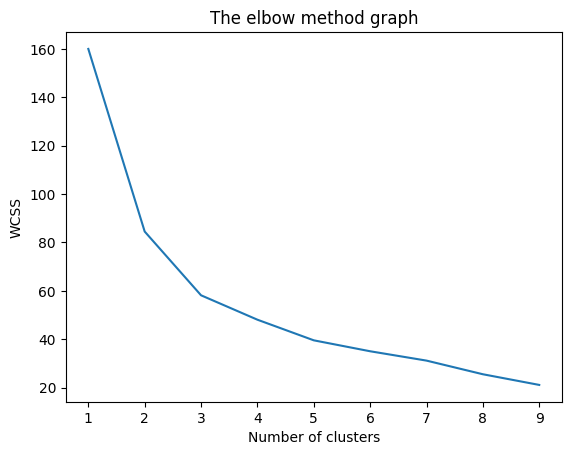

In [49]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wcss)
plt.title('The elbow method graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

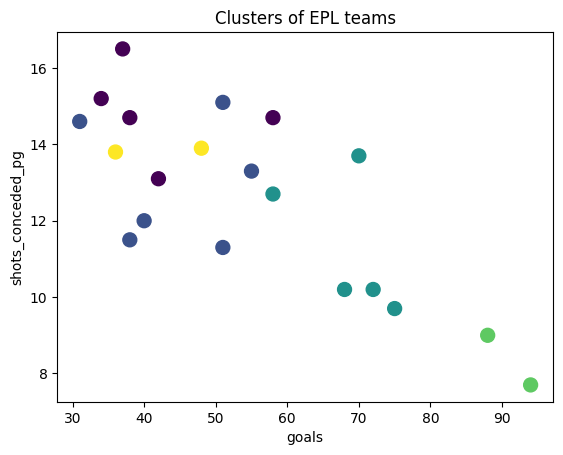

In [50]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_X)

# visualize
plt.scatter(df['goals'], df['shots_conceded_pg'], s=100, c=df['cluster'])

plt.title('Clusters of EPL teams')
plt.xlabel('goals')
plt.ylabel('shots_conceded_pg')
plt.show()

In [52]:
df

,team_name,apps,goals,possession,pass_success,aerials_won,rating,shots_conceded_pg,tackles_pg,intercept_pg,goals_pg,cluster
0,Arsenal,38,88,59.7,85.4,12.9,6.81,9.0,14.9,6.2,2.315789,3
1,Aston Villa,38,51,49.2,81.1,11.7,6.65,11.3,16.7,8.5,1.342105,1
2,Bournemouth,38,37,40.0,77.5,13.8,6.53,16.5,16.3,9.3,0.973684,0
3,Brentford,38,58,43.3,74.8,17.5,6.67,14.7,15.4,9.0,1.526316,0
4,Brighton,38,72,60.5,85.9,11.7,6.72,10.2,16.2,8.0,1.894737,2
5,Chelsea,38,38,58.8,85.8,13.1,6.62,11.5,19.5,9.0,1.000000,1
6,Crystal Palace,38,40,45.8,79.3,13.1,6.61,12.0,18.2,9.4,1.052632,1
7,Everton,38,34,42.5,77.0,15.3,6.62,15.2,18.6,10.3,0.894737,0
8,Fulham,38,55,48.6,80.0,13.5,6.61,13.3,16.4,8.9,1.447368,1
9,Leeds,38,48,46.3,74.9,15.5,6.50,13.9,22.1,10.3,1.263158,4


In [53]:
df.cluster.value_counts()

cluster
1    6
0    5
2    5
3    2
4    2
Name: count, dtype: int64

In [56]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    silhouette_coefficients.append(score)
    

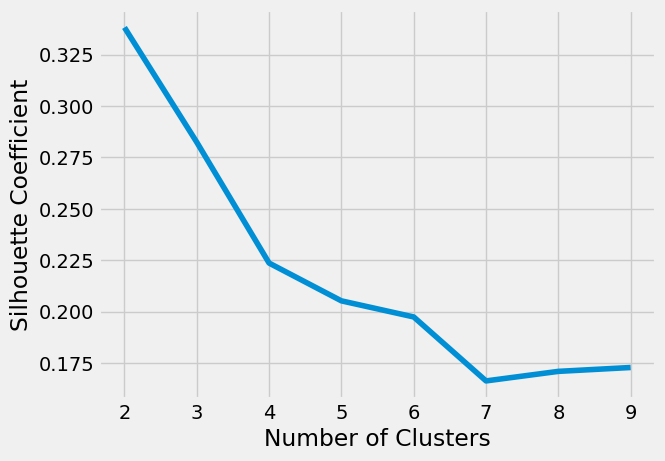

In [58]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [59]:
### visualize silhouette score
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

 
    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters=n_cluster, **kmeans_kwargs)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

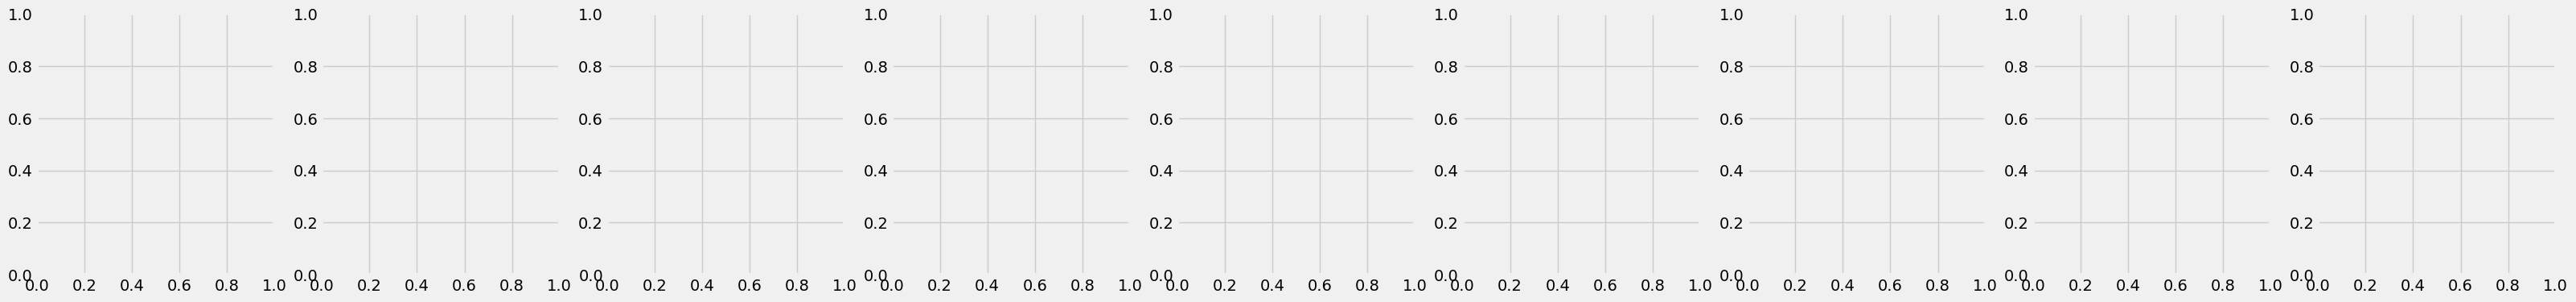

In [60]:
visualize_silhouette(range(1,10), X)